# Global Quality Estimation Proof of Concept

main goal is to establish an ROI for initial frame stabilizing and for choosing where to measure quality

because of that I think we can deal with a slightly sloppy method

let's start with some somple thresholding since we are dealing with

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read in test images

# sharp-ish frame
jupiter_frame1 = cv2.imread("../tests/data/images/jupiter_frame_highq.png")

# blurry frame
jupiter_frame2 = cv2.imread("../tests/data/images/jupiter_frame_lowq.png")

# very very low noise
moon = cv2.imread("../tests/data/images/moon_stacked_sharpened.jpg")

print(jupiter_frame1.dtype)

uint8


In [6]:
def plot(img, color = True):   
    # plt.figure(figsize=(10,10))
    if color:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap="gray")
    plt.show()

def plot_pair(img1, img2, color = True):
    # plt.figure(figsize=(10,10))
    if color:
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(img1, cmap="gray"))
        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(img2, cmap="gray"))
        plt.show()

# # plots mask with green overlay
# def plot_overlay(img, mask):
#     color_mask = np.stack([mask, mask, mask], axis=2)
#     color_mask[:, :, 0][mask == 255] = 0
#     color_mask[:, :, 2][mask == 255] = 0

#     plt.figure(figsize=(6, 6))
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.imshow(color_mask, alpha=0.2)
#     plt.show()

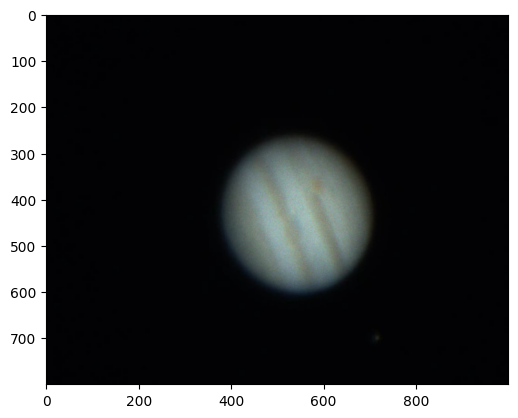

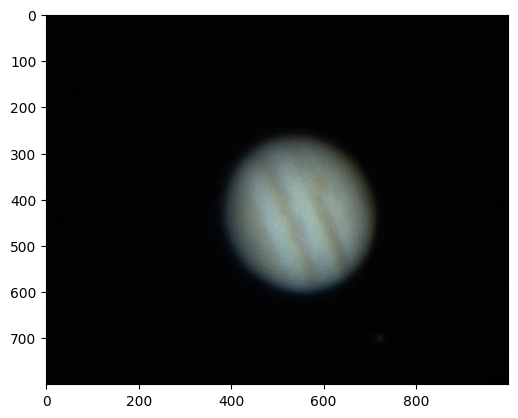

In [9]:
plot(jupiter_frame1)
plot(jupiter_frame2)

## Try different contrast methods

In [21]:
# both expect grayscale

def rms_constrast(img):
    return img.std()

def michelson_constrast(img):
    minimum = np.min(img)
    maximum = np.max(img)
    return (maximum - minimum) / (maximum + minimum)

In [24]:
def crop_jupiter_to_roi(img):
    return img[330:530, 400:680]

In [27]:
lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2Lab)[:, :, 0]
lum = cv2.GaussianBlur(lum, (3, 3), 0)
# lum = crop_jupiter_to_roi(lum)
print(rms_constrast(lum))
print(michelson_constrast(lum))
print(lum.mean())

39.78041727948091
0.9898477157360406
14.32491125


In [28]:
lum = cv2.cvtColor(jupiter_frame2, cv2.COLOR_BGR2Lab)[:, :, 0]
lum = cv2.GaussianBlur(lum, (3, 3), 0)
# lum = crop_jupiter_to_roi(lum)
print(rms_constrast(lum))
print(michelson_constrast(lum))
print(lum.mean())

39.85263736934043
0.9896373056994818
14.41381875


## Try different edge/gradient methods

Strenght of edges can serve as a proxy for sharpness of an image

254.58495486371092


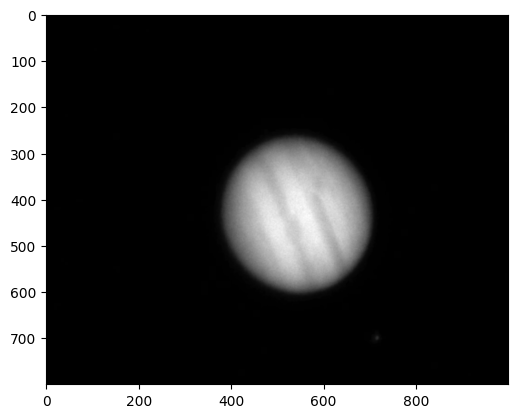

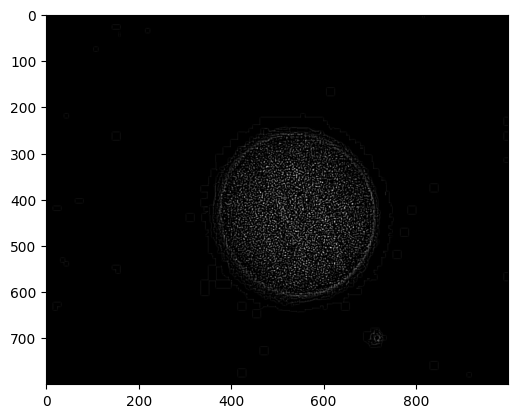

In [14]:
# laplacian method

lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2Lab)[:, :, 0]
lum = cv2.GaussianBlur(lum, (3, 3), 0)
edges = cv2.Laplacian(lum, -1, ksize=5)
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print(edges.var())

plot(lum, False)
plot(edges, False)

261.2138734946734


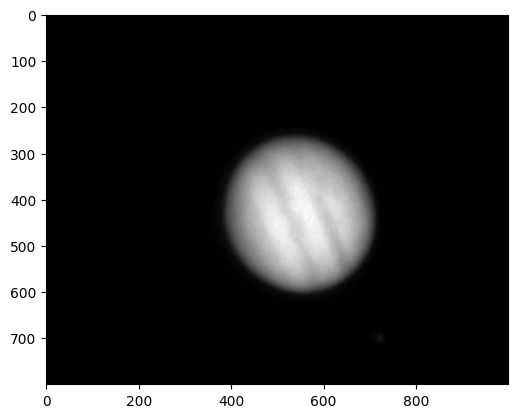

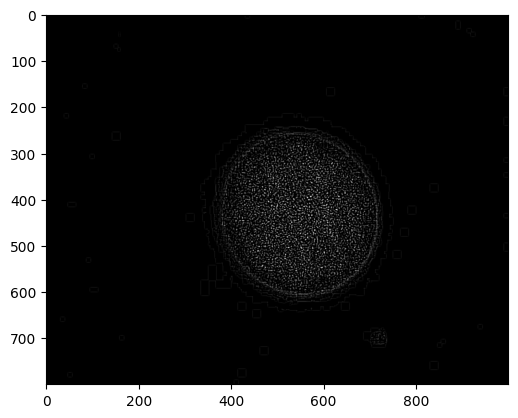

In [13]:
# laplacian method

lum = cv2.cvtColor(jupiter_frame2, cv2.COLOR_BGR2Lab)[:, :, 0]
lum = cv2.GaussianBlur(lum, (3, 3), 0)
edges = cv2.Laplacian(lum, -1, ksize=5)
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print(edges.var())

plot(lum, False)
plot(edges, False)

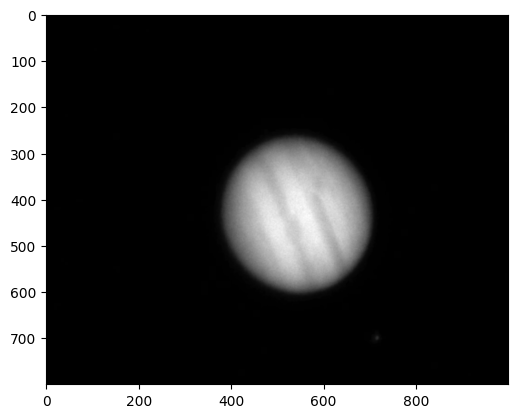

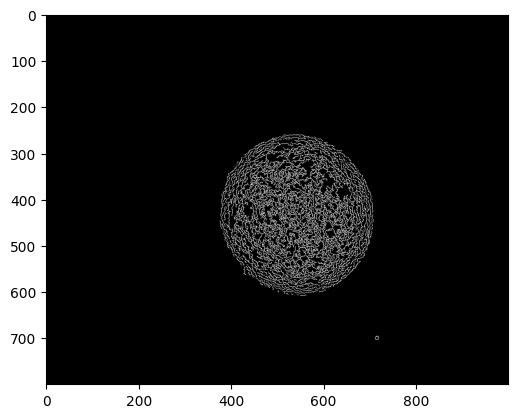

In [7]:
# canny method

lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2Lab)[:, :, 0]
lum = cv2.GaussianBlur(lum, (3, 3), 0)
edges = cv2.Canny(lum, 10, 30)

plot(lum, False)
plot(edges, False)

615.0163877602986


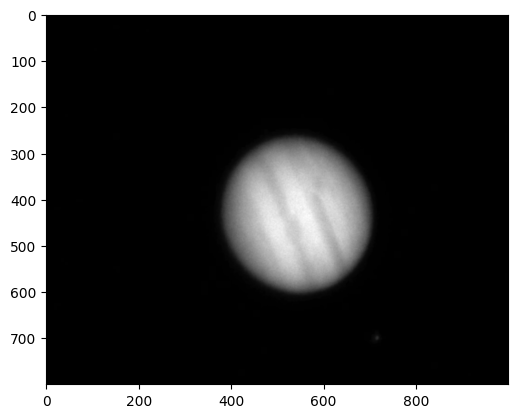

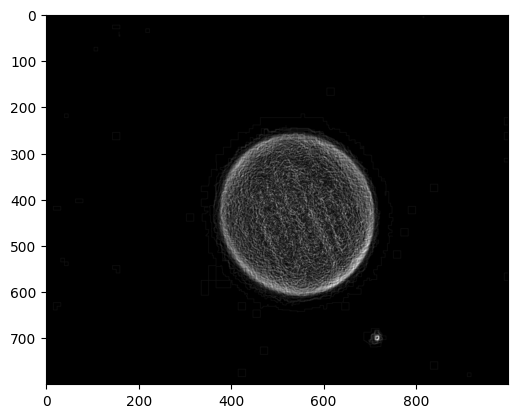

In [8]:
# gradient method

lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2Lab)[:, :, 0]
lum = cv2.GaussianBlur(lum, (3, 3), 0)

grad_x = cv2.Sobel(
    lum,
    cv2.CV_16S,
    1,
    0,
    ksize=-1,
    scale=1,
    delta=0,
    borderType=cv2.BORDER_DEFAULT,
)
grad_y = cv2.Sobel(
    lum,
    cv2.CV_16S,
    0,
    1,
    ksize=-1,
    scale=1,
    delta=0,
    borderType=cv2.BORDER_DEFAULT,
)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print(edges.var())

plot(lum, False)
plot(edges, False)

782.245503914798


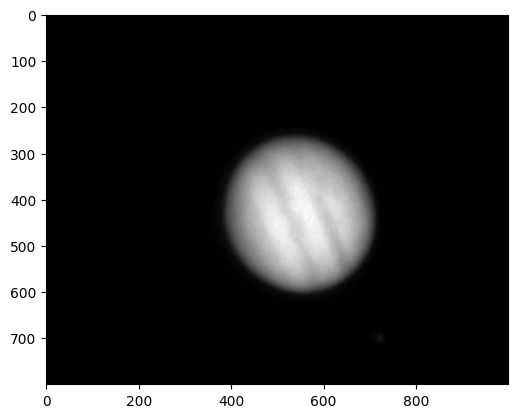

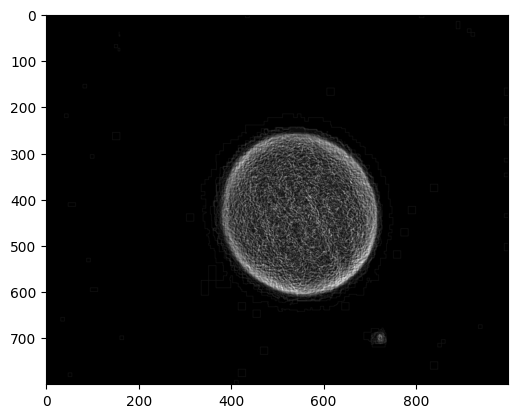

In [9]:
# gradient method

lum = cv2.cvtColor(jupiter_frame2, cv2.COLOR_BGR2Lab)[:, :, 0]
lum = cv2.GaussianBlur(lum, (3, 3), 0)

grad_x = cv2.Sobel(
    lum,
    cv2.CV_16S,
    1,
    0,
    ksize=-1,
    scale=1,
    delta=0,
    borderType=cv2.BORDER_DEFAULT,
)
grad_y = cv2.Sobel(
    lum,
    cv2.CV_16S,
    0,
    1,
    ksize=-1,
    scale=1,
    delta=0,
    borderType=cv2.BORDER_DEFAULT,
)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print(edges.var())

plot(lum, False)
plot(edges, False)

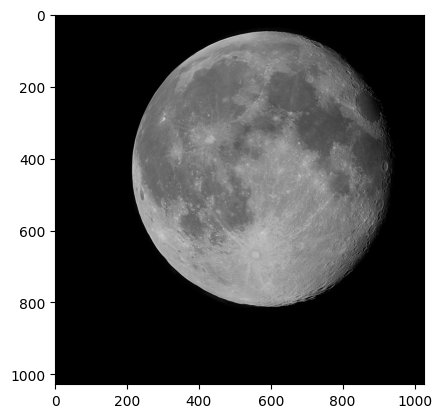

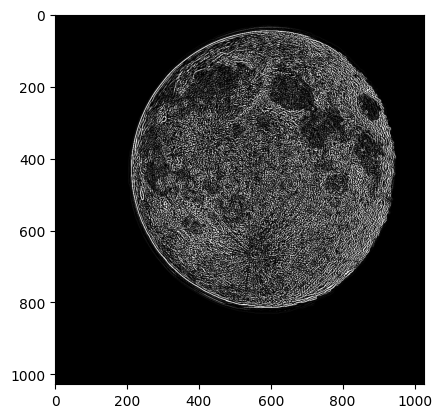

In [10]:
# laplacian method

lum = cv2.cvtColor(moon, cv2.COLOR_BGR2Lab)[:, :, 0]
# lum = cv2.GaussianBlur(lum, (3, 3), 0)
edges = cv2.Laplacian(lum, -1, ksize=5)

plot(lum, False)
plot(edges, False)

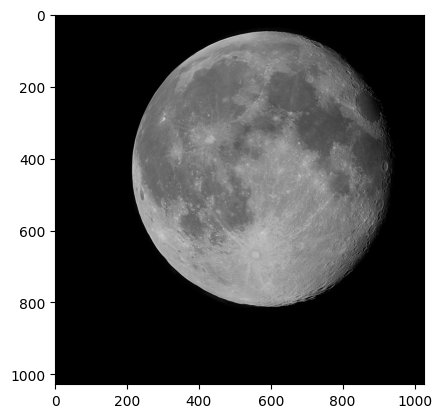

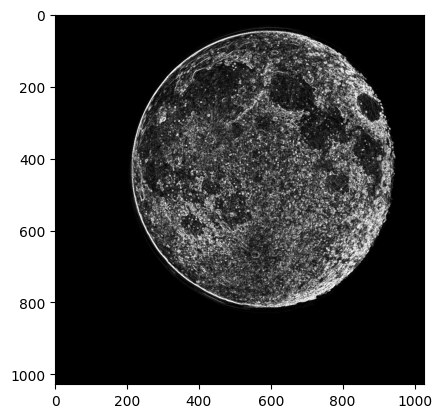

In [11]:

lum = cv2.cvtColor(moon, cv2.COLOR_BGR2Lab)[:, :, 0]
# lum = cv2.GaussianBlur(lum, (3, 3), 0)

grad_x = cv2.Sobel(
    lum,
    cv2.CV_16S,
    1,
    0,
    ksize=-1,
    scale=1,
    delta=0,
    borderType=cv2.BORDER_DEFAULT,
)
grad_y = cv2.Sobel(
    lum,
    cv2.CV_16S,
    0,
    1,
    ksize=-1,
    scale=1,
    delta=0,
    borderType=cv2.BORDER_DEFAULT,
)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plot(lum, False)
plot(edges, False)

I'm suspicious about what I'm seeing with the more blurry image having the higher variance of laplacian. I'm wondering if the issue is that it's being measured across the whole frame, so let's try using a tight ROI

In [43]:
def gradient_edges(img):
    grad_x = cv2.Sobel(
        lum,
        cv2.CV_16S,
        1,
        0,
        ksize=-1,
        scale=1,
        delta=0,
        borderType=cv2.BORDER_DEFAULT,
    )
    grad_y = cv2.Sobel(
        lum,
        cv2.CV_16S,
        0,
        1,
        ksize=-1,
        scale=1,
        delta=0,
        borderType=cv2.BORDER_DEFAULT,
    )
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return edges

def crop_jupiter_to_roi(img):
    return img[330:530, 400:680]

1088.8545517777422


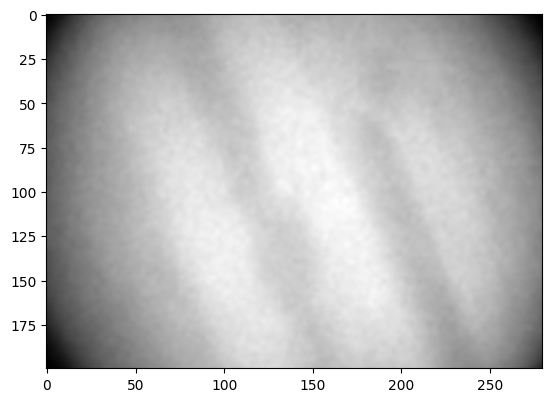

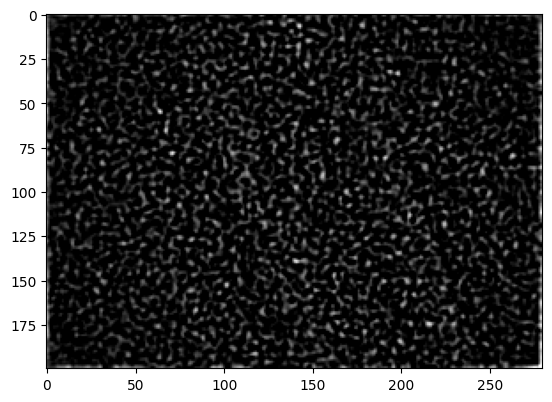

In [44]:
lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2LUV)[:, :, 0]
lum = cv2.GaussianBlur(lum, (5, 5), 0)
# lum = jupiter_frame1[:, :, 1]
lum = crop_jupiter_to_roi(lum)


edges = cv2.Laplacian(lum, -1, ksize=5)
# edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
print(edges.var())


plot(lum, False)
plot(edges, False)

218.91474417059948


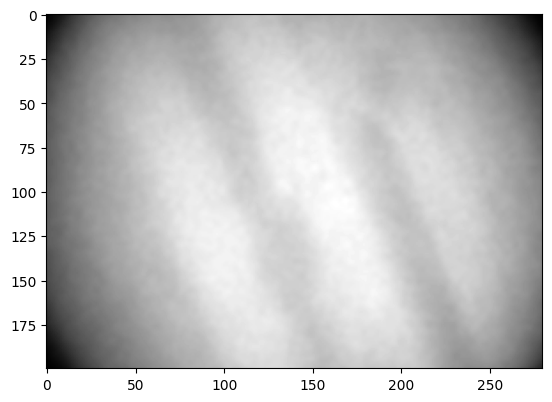

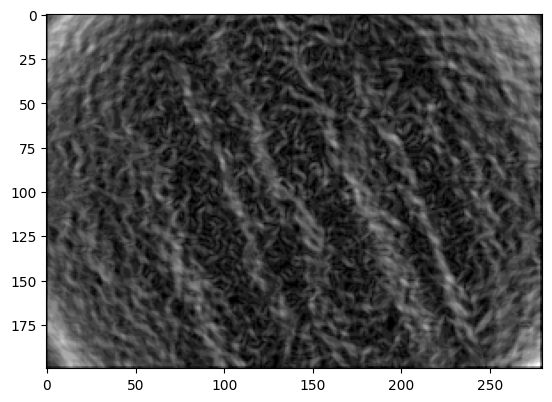

In [47]:
lum = cv2.cvtColor(jupiter_frame1, cv2.COLOR_BGR2LUV)[:, :, 0]
lum = cv2.GaussianBlur(lum, (7, 7), 0)
# lum = jupiter_frame1[:, :, 1]
lum = crop_jupiter_to_roi(lum)


edges = gradient_edges(lum)
# edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
print(edges.var())


plot(lum, False)
plot(edges, False)

205.19073946396688


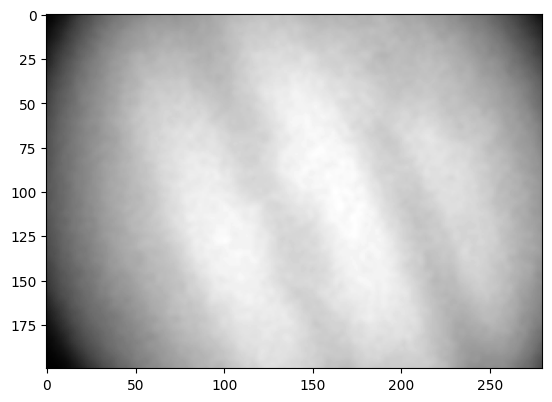

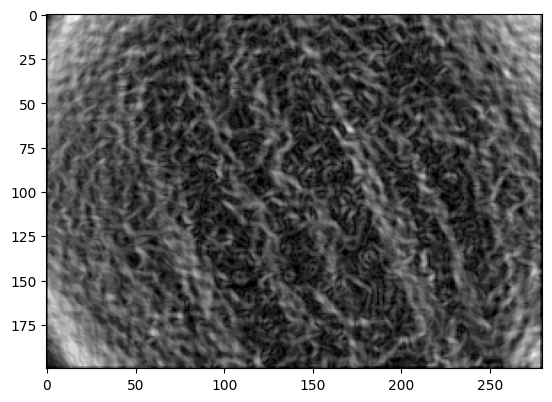

In [48]:
lum = cv2.cvtColor(jupiter_frame2, cv2.COLOR_BGR2LUV)[:, :, 0]
lum = cv2.GaussianBlur(lum, (7, 7), 0)
# lum = jupiter_frame1[:, :, 1]
lum = crop_jupiter_to_roi(lum)


edges = gradient_edges(lum)
# edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
print(edges.var())


plot(lum, False)
plot(edges, False)